<a href="https://colab.research.google.com/github/Elizav555/Data_Mining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сначала я просто долго разбиралась с питоном, библиотеками и эксперементировала с различными датасетами, но никак не могла поставить себе конкретную задачу для кластеризации.Но когда я наткнулась на данный датасет, то решила проверить, насколько кластеризация данных различными алгоритмами позволит приблизится к разбиению по странам производителям,которые уже указаны.

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

Ниже я попробовала кластеризовать с помощью алгоритма KMeans. Когда я инициализировала модель с параметром k-means++ ( Выбирает центроиды далекие друг от друга, в документации сказано, что должно быть более эффективно, чем рандомный выбор, но не в моем случае), то количество ошибок было гораздо больше. В качестве точки останова я задала максимальное кол-во итераций равное 300. Начальное состояние также выбирается рандомно.

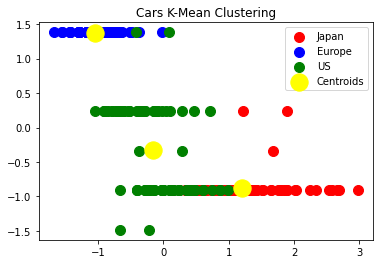

In [170]:
dataset = pd.read_csv('cars.csv')
dataset[' cubicinches'] = pd.to_numeric(dataset[' cubicinches'],errors="coerce")
dataset[' weightlbs'] = pd.to_numeric(dataset[' weightlbs'],errors="coerce")
dataset = dataset.dropna()
dataset_numeric = dataset.drop([' brand'], axis=1) #leave only numeric data
#Normalize data
dataset_values = pd.DataFrame(dataset_numeric).values
norm_dataset = (dataset_values - dataset_values.mean(axis=0)) / dataset_values.std(axis=0)
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='random',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(norm_dataset)
norm_dataset = np.asarray(norm_dataset)
X = np.array(norm_dataset)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Japan')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Europe')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='US')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cars K-Mean Clustering')
plt.legend()
plt.show()

In [99]:
dataset.insert(0,"Cluster",y_kmeans)
dataset.head(10)

,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,14.0,8,350.0,165,4209.0,12,1972,US.
1,0,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,1,17.0,8,302.0,140,3449.0,11,1971,US.
3,1,15.0,8,400.0,150,3761.0,10,1971,US.
4,0,30.5,4,98.0,63,2051.0,17,1978,US.
5,1,23.0,8,350.0,125,3900.0,17,1980,US.
6,1,13.0,8,351.0,158,4363.0,13,1974,US.
7,1,14.0,8,440.0,215,4312.0,9,1971,US.
8,2,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,0,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [100]:
dictionary = {' Europe.': 2, ' US.': 1, ' Japan.':0} #map brand column to clusters indexes
dataset[' brand']=dataset[' brand'].map(dictionary)
dataset.head(10)
i=0
for index,row in dataset.iterrows(): #count mismatch between clusters and brands
  if row[' brand']!=row['Cluster']:
    i+=1
print("Mismatches count",i)
print("Percent of similarity for k-mean clustering:", (dataset.shape[0]-i)/dataset.shape[0]*100 ,"%")

Mismatches count 115
Percent of similarity for k-mean clustering: 55.078125 %


Алгоритм K-Means с начальной настройкой рандомных центроидов позволил получить наилучший результат в 55%, что все же далеко от разбиения на страны, которое присутствует

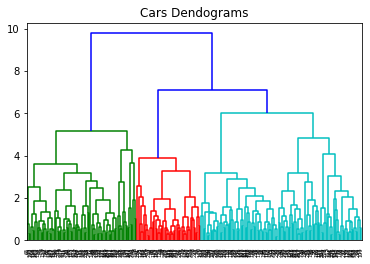

In [60]:
plt.title("Cars Dendograms")
dend = shc.dendrogram(shc.linkage(norm_dataset, method='complete'))
plt.show()

Здесь мне стало интересно, на какое кол-во кластеров разобьет иерархический алгоритм кластеризации. На дендограмме можно видеть, что в результате иерархической кластеризации данных естественным образом произошло разбиение на три кластера, обозначенных на рисунке различным цветом. При этом исходно число кластеров не задавалось.


Agglomerative Clustering это также алгоритм иерархической кластеризации.Он рекурсивно мержит пары кластеров и может использовать различные метрики пространств для вычисления расстояний
Здесь наилучшие показатели я получила при использовании параметров “l2”и “manhattan” в affinity и при использовании минимизации среднего растояний между кластерами

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


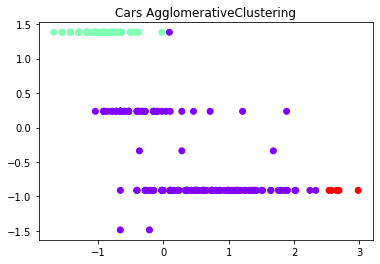

In [82]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='l2', linkage='average')
cluster.fit_predict(norm_dataset)
plt.title("Cars AgglomerativeClustering")
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [83]:
dataset.insert(0,"Cluster2",cluster.labels_)
dataset.head(10)

,Cluster2,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,2,14.0,8,350.0,165,4209.0,12,1972,1
1,0,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,2,17.0,8,302.0,140,3449.0,11,1971,1
3,1,2,15.0,8,400.0,150,3761.0,10,1971,1
4,0,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,2,23.0,8,350.0,125,3900.0,17,1980,1
6,1,2,13.0,8,351.0,158,4363.0,13,1974,1
7,1,2,14.0,8,440.0,215,4312.0,9,1971,1
8,0,1,25.4,5,183.0,77,3530.0,20,1980,2
9,0,0,37.7,4,89.0,62,2050.0,17,1982,0


In [84]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster2']:
    i+=1
print("Mismatches count:",i)
print("Percent of similarity for Agglomerative clustering:", (dataset.shape[0]-i)/dataset.shape[0]*100 ,"%")

Mismatches count: 126
Percent of similarity for Agglomerative clustering: 50.78125 %


Результат чуть хуже, чем при использовании К средних: почти 51%, но на фоне остальных алгоритмов все еще хорош

Тогда я решила посмотреть алгоритм, который работает на основе плотности.Тут я эксперементировала с параметрами eps - максимальное расстояние, которое рассматривается при построении кластеров, и min_samples- минимальное кол-во точек, необходимых для построения кластеров. Наибольшее влияние на процент ошибок оказывал именно второй параметр

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


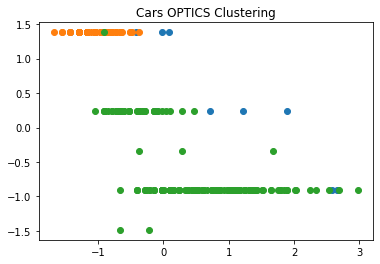

In [133]:
model = OPTICS(eps=10, min_samples=20)
optics = model.fit_predict(norm_dataset)
clusters = np.unique(optics)
for cluster in clusters:
	row_ix = np.where(optics == cluster)
	plt.title("Cars OPTICS Clustering")
	plt.scatter(X[row_ix, 0],X[row_ix, 1])
plt.show()

In [134]:
optics = optics+1 #normalize clusters indexes
dataset.insert(0,"Cluster3",optics)
dataset.head(10)

,Cluster3,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,1,14.0,8,350.0,165,4209.0,12,1972,1
1,2,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,1,17.0,8,302.0,140,3449.0,11,1971,1
3,1,1,15.0,8,400.0,150,3761.0,10,1971,1
4,2,0,30.5,4,98.0,63,2051.0,17,1978,1
5,0,1,23.0,8,350.0,125,3900.0,17,1980,1
6,1,1,13.0,8,351.0,158,4363.0,13,1974,1
7,0,1,14.0,8,440.0,215,4312.0,9,1971,1
8,2,2,25.4,5,183.0,77,3530.0,20,1980,2
9,2,0,37.7,4,89.0,62,2050.0,17,1982,0


In [135]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster3']:
    i+=1
print("Mismatches count:",i)
print("Percent of similarity for OPTICS clustering:", (dataset.shape[0]-i)/dataset.shape[0]*100 ,"%")

Mismatches count: 146
Percent of similarity for OPTICS clustering: 42.96875 %


Результат хуже, чем у предыдущих : почти 43%

Теперь я обратила свое внимание на алгоритм,работающий на основе деревьев. В BIRCH алгоритме признаки кластеризации организуются в CF-дерево, высоко сбалансированное дерево с двумя параметрами: коэффициентом ветвления и порогом. Коэф ветвления ограничивает число кластеров, а порог ограничивает расстоение между новой входной точкой и существующими кластерами.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


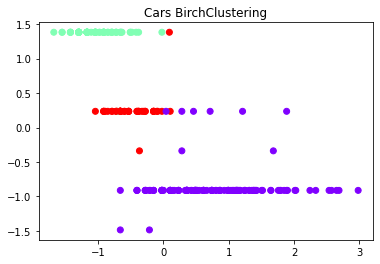

In [157]:
model = Birch(threshold=0.2, n_clusters=3)
model.fit_predict(norm_dataset)
plt.title("Cars BirchClustering")
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
plt.show()

In [158]:
dataset.insert(0,"Cluster4",model.labels_)
dataset.head(10)

,Cluster4,Cluster3,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,1,1,14.0,8,350.0,165,4209.0,12,1972,1
1,0,2,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,1,1,17.0,8,302.0,140,3449.0,11,1971,1
3,1,1,1,15.0,8,400.0,150,3761.0,10,1971,1
4,0,2,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,0,1,23.0,8,350.0,125,3900.0,17,1980,1
6,1,1,1,13.0,8,351.0,158,4363.0,13,1974,1
7,1,0,1,14.0,8,440.0,215,4312.0,9,1971,1
8,0,2,2,25.4,5,183.0,77,3530.0,20,1980,2
9,0,2,0,37.7,4,89.0,62,2050.0,17,1982,0


In [159]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster4']:
    i+=1
print("Mismatches count:",i)
print("Percent of similarity for Birch clustering:", (dataset.shape[0]-i)/dataset.shape[0]*100 ,"%")

Mismatches count: 129
Percent of similarity for Birch clustering: 49.609375 %


Постепенно уменьшая параметр threshold я подобрала оптимальное значение 0,2, которое позволило мне получить результат в почти 50%

Ну и на последок я рассмотрела алгоритм, который используют спектр (собственные значения) матрицы сходства данных для осуществления снижения размерности перед кластеризацией. Матрица сходства подаётся в качестве входа и состоит из количественных оценок относительной схожести каждой пары точек в данных. Тут есть возможность задавать достаточно большое число параметров, но я поэксперементировала с параметром, отвечающим за способ построения матрицы.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


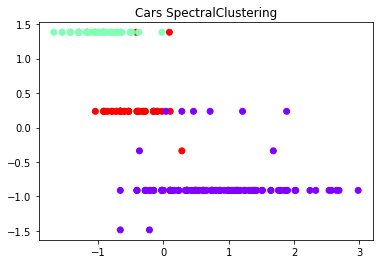

In [167]:
spectral = SpectralClustering( n_clusters=3, affinity="rbf")
spectral.fit_predict(norm_dataset)
plt.title("Cars SpectralClustering")
plt.scatter(X[:,0], X[:,1], c=spectral.labels_, cmap='rainbow')
plt.show()

In [168]:
dataset=dataset.drop(["Cluster5"],axis=1)
dataset.insert(0,"Cluster5",spectral.labels_)
dataset.head(10)

,Cluster5,Cluster4,Cluster3,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,1,1,1,1,14.0,8,350.0,165,4209.0,12,1972,1
1,0,0,2,0,31.9,4,89.0,71,1925.0,14,1980,2
2,1,1,1,1,17.0,8,302.0,140,3449.0,11,1971,1
3,1,1,1,1,15.0,8,400.0,150,3761.0,10,1971,1
4,0,0,2,0,30.5,4,98.0,63,2051.0,17,1978,1
5,1,1,0,1,23.0,8,350.0,125,3900.0,17,1980,1
6,1,1,1,1,13.0,8,351.0,158,4363.0,13,1974,1
7,1,1,0,1,14.0,8,440.0,215,4312.0,9,1971,1
8,2,0,2,2,25.4,5,183.0,77,3530.0,20,1980,2
9,0,0,2,0,37.7,4,89.0,62,2050.0,17,1982,0


In [169]:
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster5']:
    i+=1
print("Mismatches count:",i)
print("Percent of similarity for Spectral clustering:", (dataset.shape[0]-i)/dataset.shape[0]*100 ,"%")

Mismatches count: 130
Percent of similarity for Spectral clustering: 49.21875 %


Здесь наилучший результат я получила при использовании радиальной базисной функции при построении матрицы - 49%

Итак, при должной настройке и подборе параметров мне удалось добиться среднего результата около 50ти процентов схожести с разбиением по странам для используемых алгоритмов, несмотря на то, что при стандартных настройках большинство выдавало 30-35%, а некоторые и 20%.
Самым сложным для меня оказалось разобраться с работой с питоном (мой второй опыт использования данного языка), подобрать данные, так как большинство алгоритмов хорошо работают только с нормализованными числовыми значениями и поставить себе задачу для изучения. 